In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from config import get_from_config, save_to_config
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var, get_average_signal
shift_03_09_2020 = path_assistant.PathAssistant('shift_03_09_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
waveforms_dir = shift_03_09_2020.get_waveforms_dir()
results_dir = shift_03_09_2020.get_results_dir()
additional_data_dir = shift_03_09_2020.get_additional_data_dir()
bpm_files_df = shift_03_09_2020.get_bpm_files_df()
acnet_data_df = shift_03_09_2020.get_acnet_data_df("all_acnet_data_for_directly_connected_case_03_09_2020.csv")

t1 = datetime(2020, 3, 9, 19, 8, 0)
t2 = datetime(2020, 3, 9, 19, 42, 0)
fluctuation_waveforms_df = shift_03_09_2020.get_fluctuation_waveforms_df()
bpm_files_df = shift_03_09_2020.get_bpm_files_df()
bpm_files_df = bpm_files_df[(bpm_files_df["file_datetime"] > t1) \
& (bpm_files_df["file_datetime"]<t2)].reset_index()
fluctuation_waveforms_df = fluctuation_waveforms_df[(fluctuation_waveforms_df["file_datetime"] > t1) \
& (fluctuation_waveforms_df["file_datetime"]<t2)].reset_index()
fluctuation_waveforms_df["rounded_bpm_file_datetime"] = \
    bpm_files_df["file_datetime"].apply(lambda t: t.round(freq='S'))
fluctuation_waveforms_df["N:IWCMI"] = fluctuation_waveforms_df["rounded_bpm_file_datetime"] \
    .apply(lambda t: acnet_data_df.loc[t, "N:IWCMI"])
res_df = shift_03_09_2020.get_fluctuations_df("res_df_directly_connected_FLAT_03_09_2020.csv")
current = -get_from_config("IWCMI_to_WCM_ABSOLUTE")*fluctuation_waveforms_df["N:IWCMI"].values
amplitude = res_df["ch2_amplitude"].values
fluctuation_waveforms_df["bpm_file_path"] = bpm_files_df["file_path"]
idx = 1
detector_wf_file_path = fluctuation_waveforms_df.loc[idx, "file_path"]
wcm_wf_file_path = fluctuation_waveforms_df.loc[idx, "bpm_file_path"]
bpm_wf_0 = -pd.read_csv(wcm_wf_file_path, index_col=0)["reconstructed_signal"]
av_lev = np.mean(bpm_wf_0[400:1000])
bpm_wf_0 = bpm_wf_0-av_lev
data_len = len(bpm_wf_0)
ch = read_waveform(detector_wf_file_path, one_channel=True)
period = get_period(ch)
detector_wf = get_average_signal(ch, period, n_bins=data_len)

In [2]:
fluctuation_waveforms_df.head()

,index,file_name,file_path,file_datetime,rounded_bpm_file_datetime,N:IWCMI,bpm_file_path
0,23,RefCurve_2020-03-09_11_190827.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:27,2020-03-09 19:08:47,-3.547789,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
1,30,RefCurve_2020-03-09_12_190831.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:31,2020-03-09 19:08:54,-3.507342,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
2,31,RefCurve_2020-03-09_13_190839.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:39,2020-03-09 19:09:10,-3.413848,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
3,32,RefCurve_2020-03-09_14_190857.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:57,2020-03-09 19:09:25,-3.319769,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
4,33,RefCurve_2020-03-09_15_190911.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:09:11,2020-03-09 19:09:32,-3.288017,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...


In [4]:
t = fluctuation_waveforms_df.loc[idx, "rounded_bpm_file_datetime"]
t

Timestamp('2020-03-09 19:08:54')

In [3]:
import lattice.lattice as lattice

In [5]:
lattice_file = shift_03_09_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.3.6ds_data.txt")

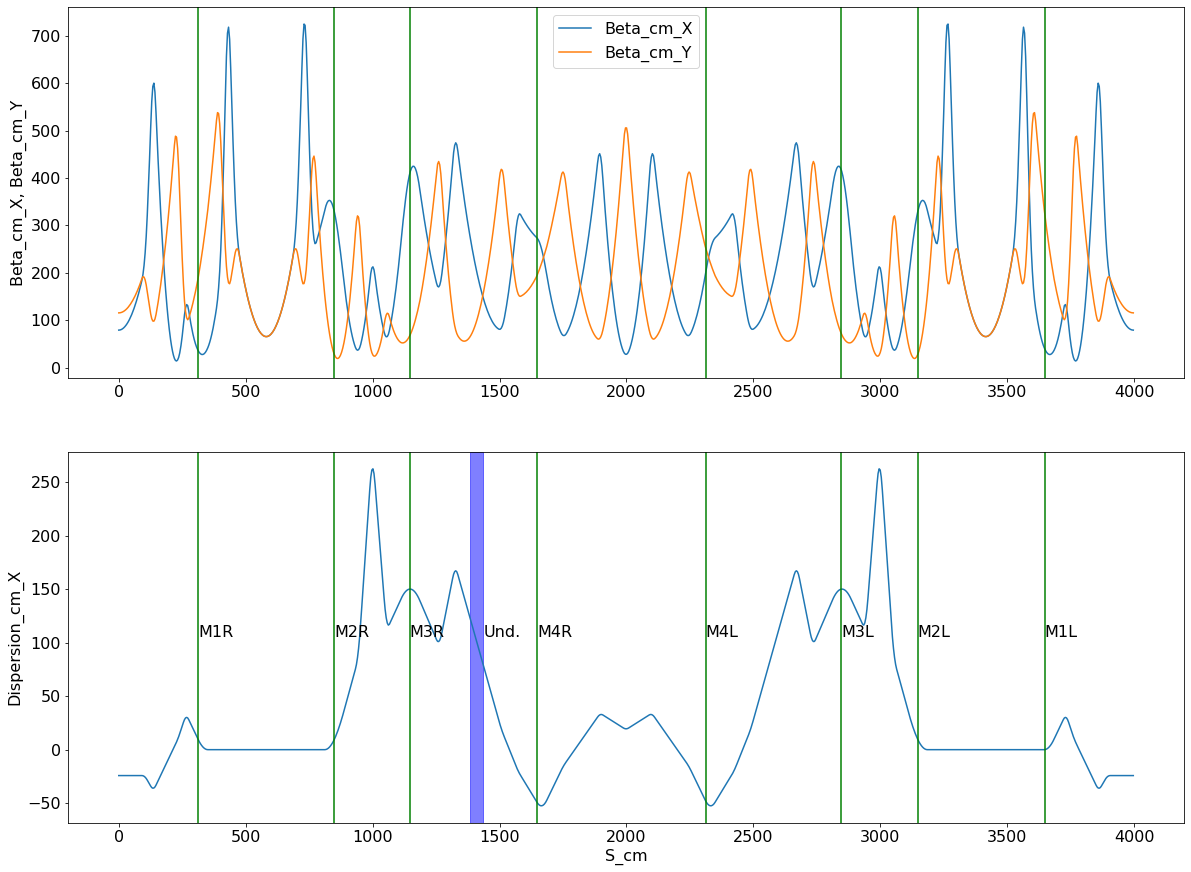

In [6]:
lattice_df = lattice.read_lattice_file(lattice_file)
lattice.plot_lattice(lattice_df)

In [7]:
cameras_df = lattice.get_cameras_df(
    lattice_df,
    acnet_data_df.loc[t, lattice.acnet_devices_X].values,
    acnet_data_df.loc[t, lattice.acnet_devices_Y].values)
cameras_df

,Name,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,ACNET_device_X,ACNET_device_Y,Measured_sigma_um_X,Measured_sigma_um_Y
0,M1R,312.390772,9.722311,36.225434,188.171560,0.508217,-1.542989,N:ITC1RSH,N:ITC1RSV,505.58398,120.947800
1,M2R,847.531424,8.867605,332.373347,30.217598,1.107789,0.754704,N:ITC2RSH,N:ITC2RSV,1556.02700,85.664299
2,M3R,1146.760637,149.997534,410.057483,67.853144,-1.054932,-0.549460,N:ITC3RSH,N:ITC3RSV,1777.37600,108.366400
3,M4R,1648.557835,-49.483645,272.884031,195.416364,0.304775,-0.662569,N:ITC4RSH,N:ITC4RSV,732.77100,105.998900
4,M4L,2312.048374,-47.892921,200.362880,252.677345,-1.549672,0.927709,N:ITC4LSH,N:ITC4LSV,1166.43100,184.028790
5,M3L,2846.836442,149.983921,415.934446,71.284732,0.832799,0.607294,N:ITC3LSH,N:ITC3LSV,1771.58200,80.935699
6,M2L,3146.927526,9.901680,327.556295,27.031383,-1.229046,-0.642134,N:ITC2LSH,N:ITC2LSV,1683.97190,78.132599
7,M1L,3646.794132,0.035522,40.729689,328.847554,0.616955,2.215497,N:ITC1LSH,N:ITC1LSV,527.91602,154.405500


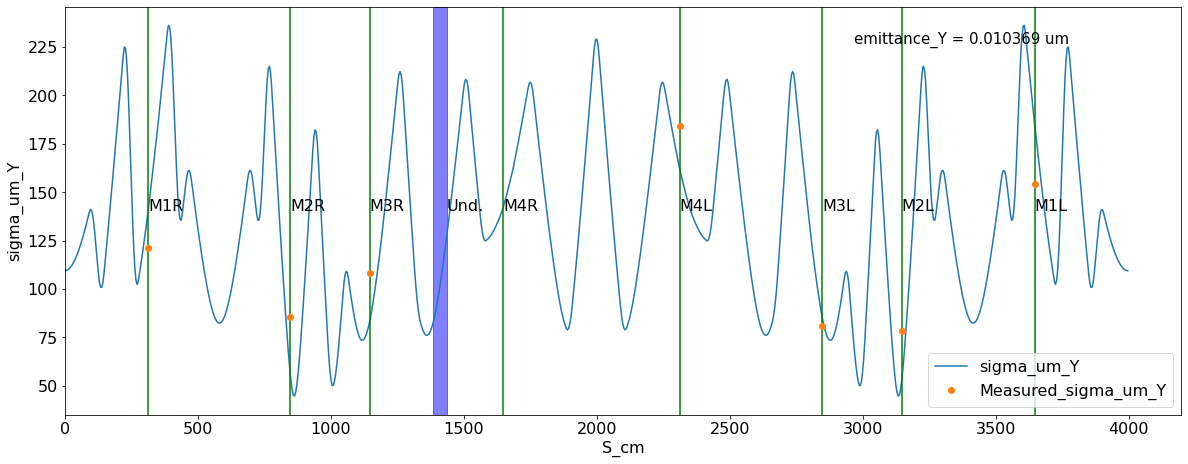

In [8]:
ey_um, ey_err = lattice.get_e_um_Y_scipy_curve_fit(cameras_df)
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um)

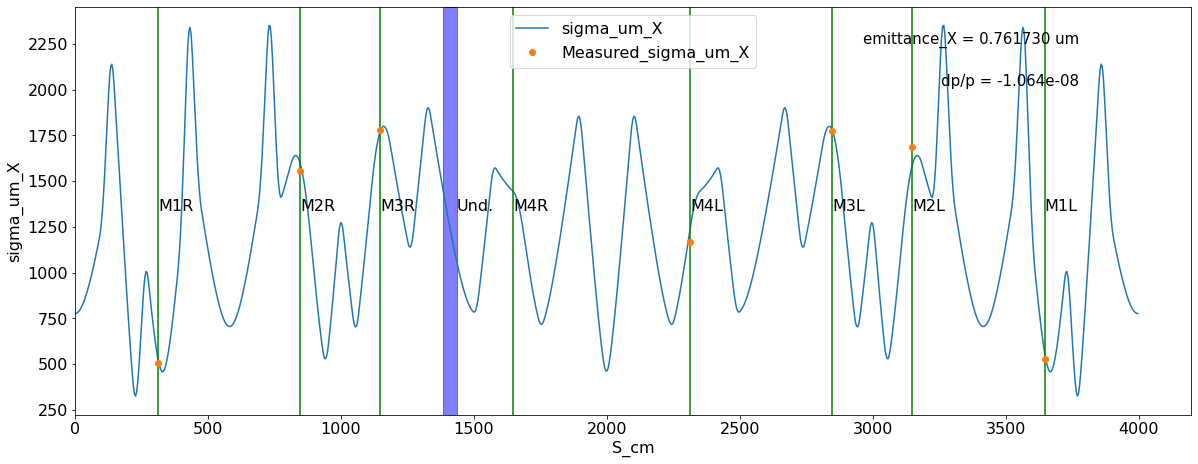

In [9]:
popt, perr = lattice.get_e_um_X_scipy_curve_fit(cameras_df)
ex_um, dpp = popt
ex_err, dpp_err = perr
lattice.show_sigma_fit(lattice_df, cameras_df, 'X', ex_um, dpp=dpp)

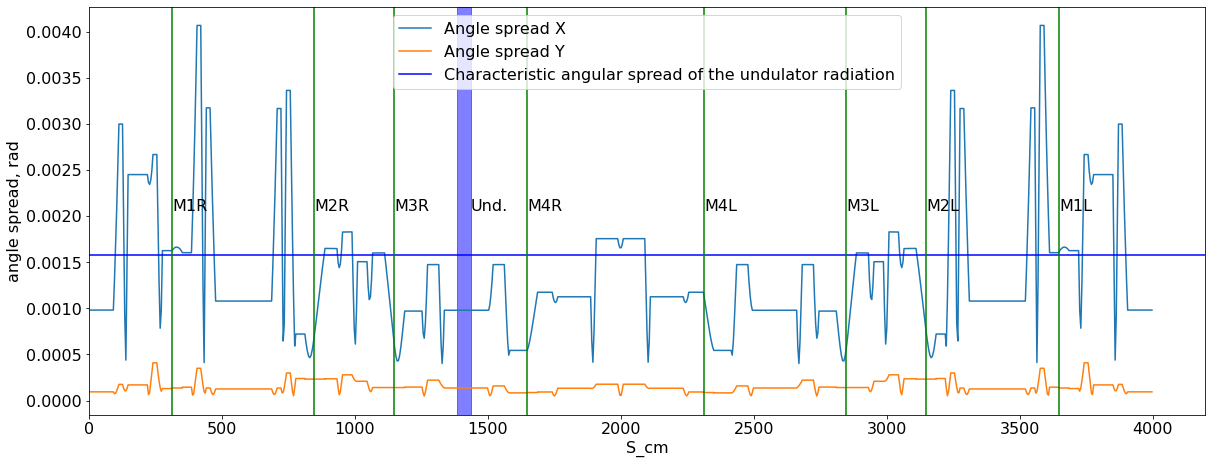

In [10]:
lattice.show_angle_spread_X_Y(lattice_df, ex_um, ey_um)

In [11]:
undulator_df = lattice.get_undulator_df(lattice_df, ex_um, ey_um, dpp)
undulator_df

,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,Sigma_um_X,Sigma_um_Y,Angle_spread_rad_X,Angle_spread_rad_Y
Start,1383.90,122.936779,276.365925,65.280075,1.574657,-0.412112,1450.917870,82.273827,0.000979,0.000136
Middle,1409.65,101.204607,203.630155,98.414182,1.250287,-0.874287,1245.436611,101.018338,0.000979,0.000136
End,1435.40,79.472435,147.585260,155.330115,0.925917,-1.336463,1060.283675,126.910984,0.000979,0.000136


In [12]:
a_x = undulator_df.loc["Middle", "Angle_spread_rad_X"]
a_y = undulator_df.loc["Middle", "Angle_spread_rad_Y"]

In [13]:
from wiggler_radiation.transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
wiggler = Wiggler(K_peak=1.0)
x_max = 0.007257142857142857
y_max = x_max/np.sqrt(2)
n_x = 250
n_y = int(n_x/np.sqrt(2))
n_l = 80
l_min = 0.85
l_max = 1.3
x_step = x_max/(n_x-1)
y_step = y_max/(n_y-1)
l_step = (l_max-l_min)/(n_l-1)
mesh = (np.linspace(x_step/2, x_max+x_step/2, n_x),
        np.linspace(y_step/2, y_max+y_step/2, n_y),
        np.linspace(l_min, l_max, n_l))
spectral_transmission = transmission_function(mesh[2])
wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=100/0.511,
    harmonics=[1],
    aperture='ellipse',
    only_calc_sum_of_both_polarizations=True,  # if False, then both polarizations are calculated separately
    spectral_transmission=spectral_transmission
    )
wr_sim.calc_photon_flux_on_meshgrid()
wr_sim.extend_results_using_symmetries()

In [14]:
def weight(shift):
    return x_step/np.sqrt(2*np.pi)/a_x*np.exp(-1/2*(x_step*shift/a_x)**2)

In [15]:
max_shift = int(4*a_x/x_step)
max_shift

134

In [16]:
def shift_along_x(arr_3D, shift):
    res = np.roll(arr_3D, shift, axis=2)
    if shift>=0:
        res[:,:,:shift] = 0
    else:
        res[:,:,shift:] = 0
    return res

In [17]:
res0 = wr_sim.get_photon_flux_3D()

In [18]:
res = np.zeros(res0.shape)
for shift in range(-max_shift, max_shift+1):
    res += weight(shift)*shift_along_x(res0, shift)

In [19]:
wr_sim.set_photon_flux_3D(polarization='sum', value=res)

In [20]:
wr_sim.get_total_photon_flux()

0.012218998668168616

In [21]:
tot = 0
for shift in range(-max_shift, max_shift+1):
    tot += weight(shift)

In [22]:
tot

0.9999375696186434